In [1]:
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img=cv2.imread("normal.jpg")

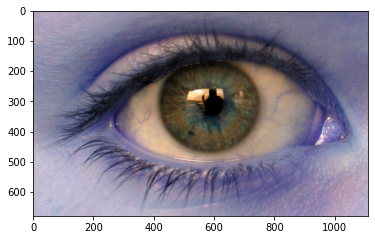

In [3]:
plt.imshow(img)

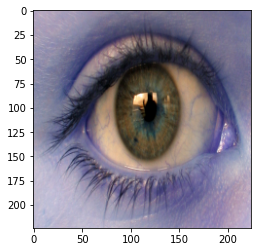

In [4]:
c=0
crop_radius_list = [] 
img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
plt.imshow(img)


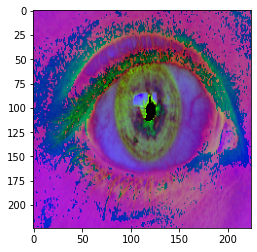

In [5]:
frame = img
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

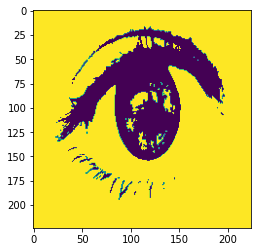

In [6]:
sensitivity = 156
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])
# Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv, lower_white, upper_white)
plt.imshow(mask)

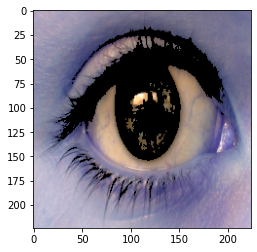

In [7]:
res = cv2.bitwise_and(frame,frame, mask= mask)
plt.imshow(res)

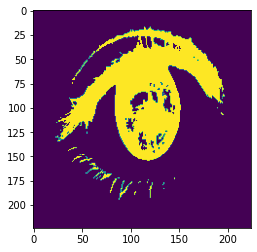

In [8]:
ret, thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

In [9]:
circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 1.5, 100,param1=80,param2=40,minRadius=0
                           ,maxRadius=100)
x,y,r = 0,0,0
if circles is not None:
    c+=1
    circles = np.uint16(np.around(circles))
    x,y,r = circles[0][0]
    x=int(x)
    y=int(y)
    r=int(r)
    crop_radius_list.append(r)
mask = np.zeros((224,224), np.uint8)
# plt.imshow(mask)

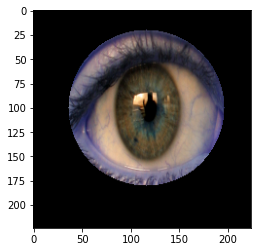

In [10]:
cv2.circle(mask,(x,y),r,(255,255,255),-1)
masked_data = cv2.bitwise_and(frame, frame, mask=mask)
plt.imshow(masked_data)

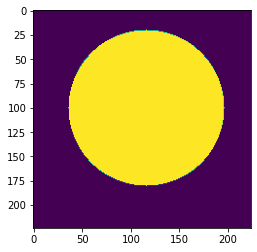

In [11]:

_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

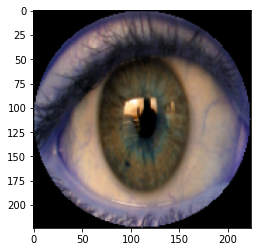

In [12]:
cnt = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
x,y,w,h = cv2.boundingRect(cnt[0])

crop = masked_data[y:y+h,x:x+w]
crop = cv2.resize(crop, (224,224), interpolation = cv2.INTER_AREA)

plt.imshow(crop)


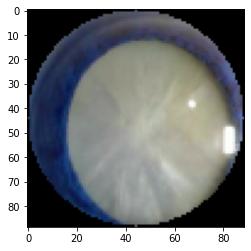

In [13]:
size=100
hei=[]
wei=[]
c=0

img=cv2.imread('cataract.jpg')
img = cv2.resize(img, (size, size), interpolation = cv2.INTER_AREA)
oimg=img.copy()
kernel=np.ones((3,3),np.uint8)
cimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#80 30
clahe = cv2.createCLAHE(clipLimit = 5) 
final_img = clahe.apply(cimg) + 30
# 80 33 for clahe size 80
#80 42 for 100
circles = cv2.HoughCircles(final_img,cv2.HOUGH_GRADIENT,1,20,param1=80,param2=42,minRadius=0,maxRadius=0)
if circles is not None:
        c+=1
        detect_circles = np.uint16(np.around(circles)) 
        max_a=0
        for i in detect_circles[0,:]:
            # draw the outer circle
            ar=int(i[2]*i[2]*3.14)
            if ar>max_a:
                x=i[0]
                y=i[1]
                r=i[2]
            max_a=ar
x=int(x)
y=int(x)
r=int(x)
height,width=cimg.shape
mask = np.zeros((height,width), np.uint8)
cv2.circle(mask,(x,y),r,(255,255,255),-1)
masked_data = cv2.bitwise_and(img, img, mask=mask)
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
# Find Contour
cnt = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
            #print len(contours)
x,y,w,h = cv2.boundingRect(cnt[0])
            # Crop masked_data
crop = masked_data[y:y+h,x:x+w]
plt.imshow(crop)

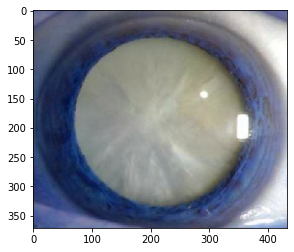

In [14]:
img=cv2.imread('cataract.jpg')
plt.imshow(img)